# Week 02 Audio Content Analysis Lab

Course: Z604 Music Data Mining
- Instructor: Kahyun Choi
- Reference: https://librosa.github.io/librosa/

## Setup

Download data files of the week from GitHub

In [1]:
# if you meet "fatal: destination path 'W02' already exists and is not an empty directory" error, uncomment the line below and run again
# !rm -fr W02/
!git clone https://github.com/music-data-mining/W02.git

Cloning into 'W02'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 76 (delta 19), reused 56 (delta 5), pack-reused 0
Receiving objects: 100% (76/76), 16.46 MiB | 13.03 MiB/s, done.
Resolving deltas: 100% (19/19), done.


Using %cd command, go to your colab notebook directory. The directory of data files is "/content/W02"

In [2]:
%cd W02

/content/W02


Check your current directory using %pwd to see if you are in the right place

In [3]:
%pwd

'/content/W02'

Import libraries

In [4]:
import os
import numpy as np
import scipy as sp
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa, librosa.display

audio_folder = "lab"

# Part I: Time-Domain Features

### Load an audio file using librosa.load()

You get a warning whenever you try to load an mp3 file. You can simply ignore it.

Reference: https://github.com/librosa/librosa/issues/1015

In [5]:
filename = os.path.join(audio_folder,'000002.mp3') # audio file name
y, sr = librosa.load(filename) # this returns audio time series (np.ndarray) and sampling rate
# Ignore the warning!

In [6]:
# ipython.display.audio generates an audio player so that you can play an audio file
ipd.Audio(y, rate=sr)

In [7]:
# Show some descriptive statisitcs of the audio data
print(sp.stats.describe(y))
# precision=5: set the number of digits of precision for floating point output to 5
# suppress=True: print the numbers using fixed point notation
np.set_printoptions(precision=5, suppress=True)
print(y[300:400])
# Put back the default print options
np.set_printoptions(edgeitems=3,infstr='inf',linewidth=75, nanstr='nan', precision=8,suppress=False, threshold=1000, formatter=None)

DescribeResult(nobs=660984, minmax=(-0.94841874, 0.9465718), mean=0.00031317907, variance=0.027337285138961023, skewness=-0.010045997090786511, kurtosis=3.1974885271763664)
[-0.      -0.      -0.       0.       0.      -0.      -0.      -0.
  0.       0.      -0.       0.      -0.      -0.      -0.      -0.
 -0.      -0.      -0.      -0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.      -0.
 -0.      -0.      -0.      -0.      -0.      -0.      -0.      -0.
 -0.       0.       0.       0.00001  0.      -0.      -0.      -0.
 -0.      -0.      -0.00001 -0.00002 -0.00002 -0.00002 -0.00001 -0.00001
 -0.00002 -0.00002 -0.00002 -0.00001 -0.       0.      -0.00001 -0.00002
 -0.00001 -0.      -0.00001 -0.00002 -0.00002 -0.00002 -0.00001 -0.00003
 -0.00003 -0.00001  0.00002  0.00001 -0.00003 -0.00008 -0.00012 -0.00012
 -0.00008 -0.00009 -0.00015 -0.00024 -0.00026 -0.00018 -0.00012 -0.00013
 -0.00021 -0.00025 -0.00021 -0.00012 -0.       0.00002

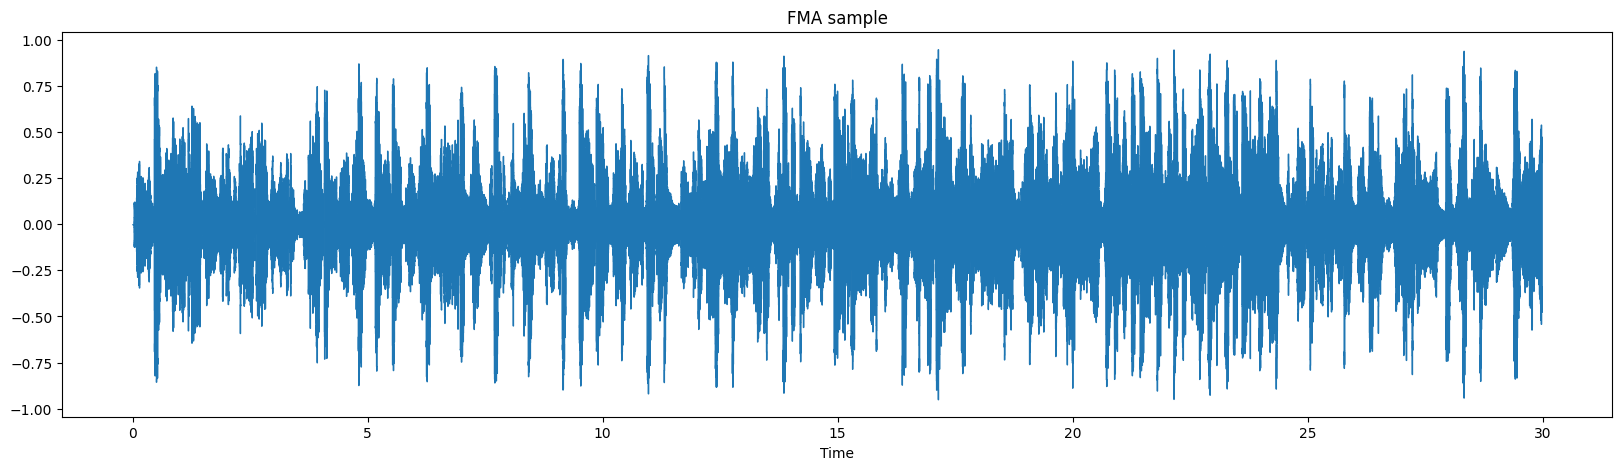

In [8]:
# Visualize an Audio File using librosa.display.waveplot
plt.figure(num=None, figsize=(20, 5))
librosa.display.waveshow(y, sr=sr) #librosa.display.waveplot(y, sr=sr)
plt.title('FMA sample')
plt.show()

## Loudness

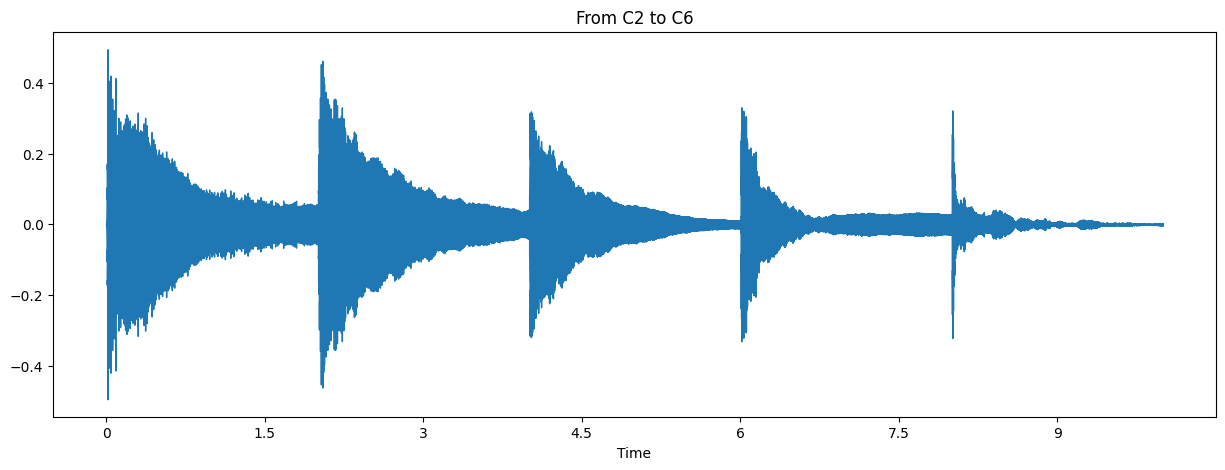

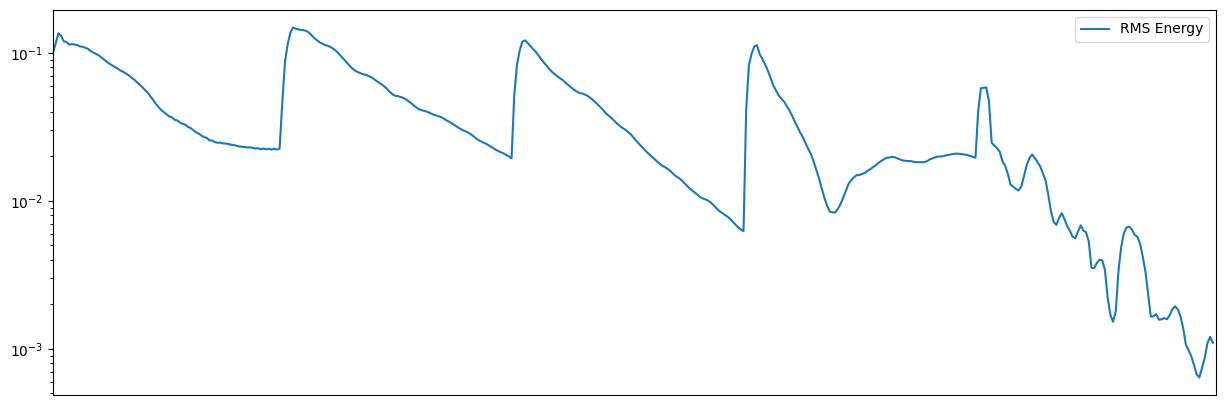

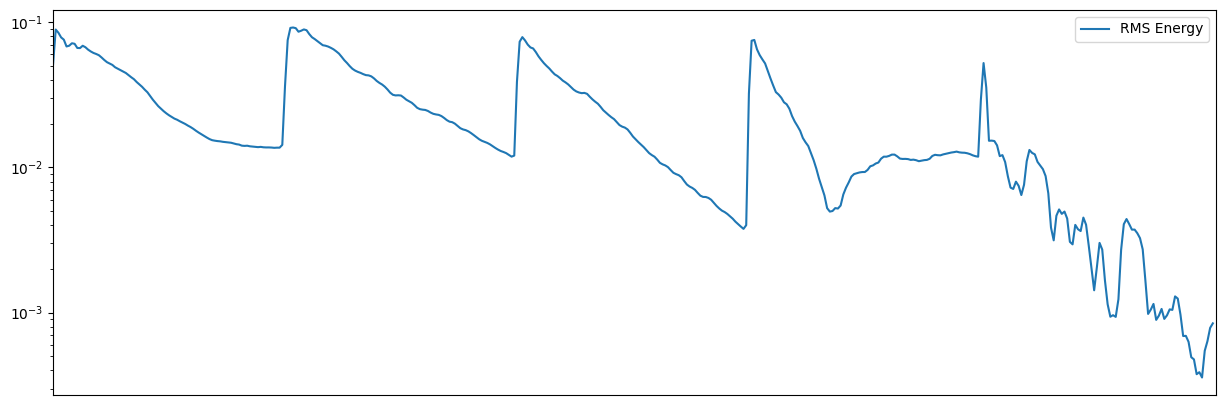

In [14]:
filename = os.path.join(audio_folder,'piano_C2toC6.wav')
y, sr = librosa.load(filename)

# display its waveform
plt.figure(num=None, figsize=(15, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("From C2 to C6")
#plt.savefig('wave_C2C6.pdf', format='pdf')

# The Root-Mean Square (RMS) of the waveform magnitude within a frame indicates loudness
rms = librosa.feature.rms(y=y)
plt.figure(num=None, figsize=(15, 5))
plt.semilogy(rms.T, label='RMS Energy') # Make a plot with log scaling on the y axis
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
#plt.savefig('rms_C2C6.pdf', format='pdf')

# librosa.feature.rms can also take the spectrogram magnitude as an input
# Using a spectrogram will give a more accurate representation of energy over time
# because its frames can be windowed, thus prefer using S if it’s already available.
# S = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
S = np.abs(librosa.stft(y))
rms2 = librosa.feature.rms(S=S)
plt.figure(num=None, figsize=(15, 5))
plt.semilogy(rms2.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms2.shape[-1]])
plt.legend()

## Generate a pure tone and plot it using plot

### Pure tone A3
- Frequency: A3, 220 Hz
- Length: 1 second
- Sampling rate: 22050 Hz

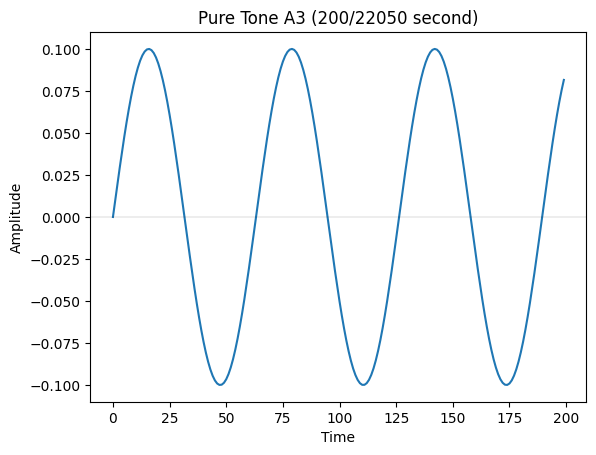

In [9]:
T = 1.0 # seconds
f0 = 349.23 # fundamental frequency
sr = 22050 # sampling rate

t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
y = 0.1*np.sin(2*np.pi*f0*t)
sf.write(os.path.join(audio_folder,'tone_220.wav'), y, sr)

# plot a waveform of an excerpt of the pure tone just created
plt.plot(np.arange(0,200),y[0:200])
plt.title("Pure Tone A3 (200/22050 second)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.axhline(linewidth=0.1, color='k') # Add a horizontal line across the X axis
plt.show()

# ipython.display.audio generates an audio player so that you can play an audio file
ipd.Audio(y, rate=sr)

## Sampling Rate and Fundamental Frequency

In [16]:
# Load flute_test1.wav
filename = os.path.join(audio_folder,'flute_test1.wav')
y, sr = librosa.load(filename)

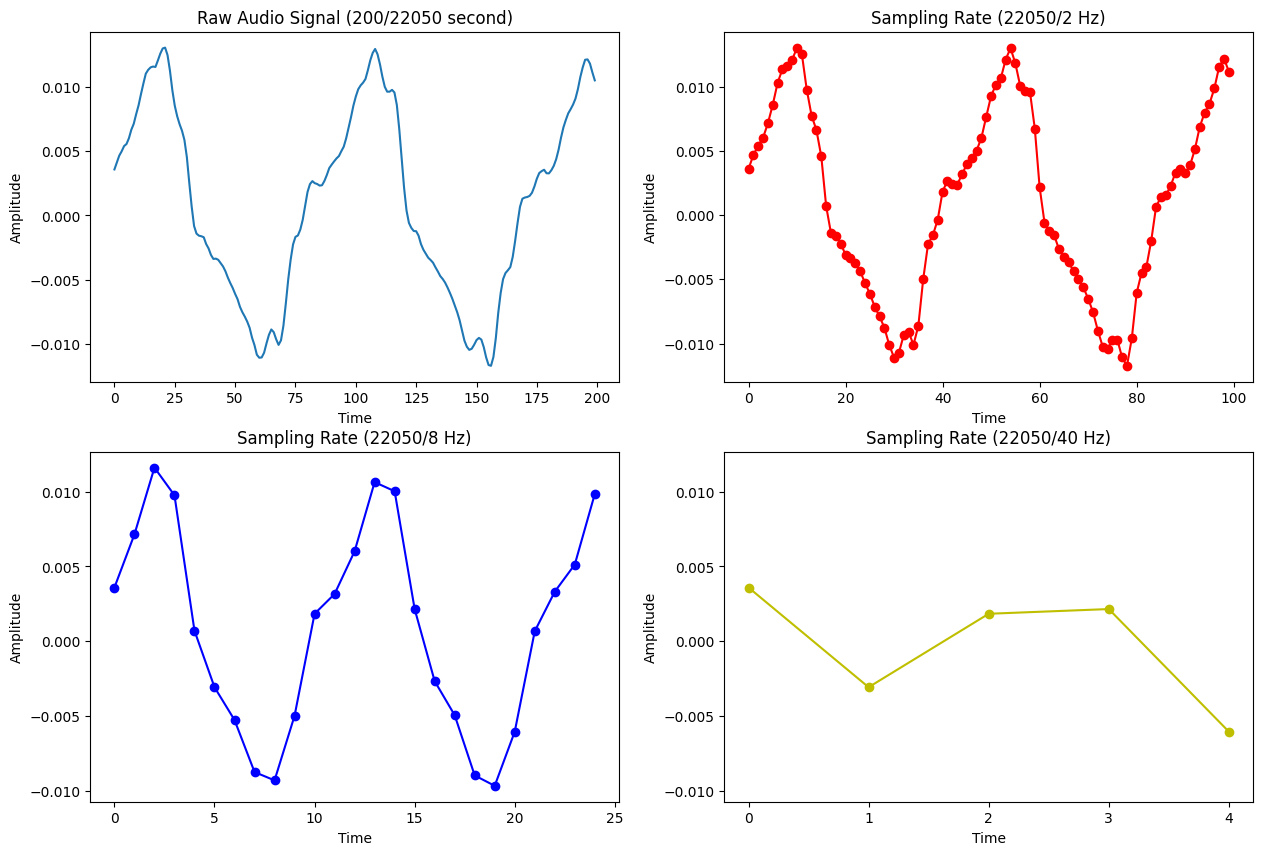

In [17]:
# Each audio signal has different sampling rates
# Figure 1-1 200/22050 Hz (Original signal)
# Figure 1-2 22050/2 Hz (The restored signal is the same as the original signal)
# Figure 2-1 22050/8 Hz (You can see minor distortions)
# Figure 2-2 22050/40 Hz (The signal is completely different from the original signal)

plt.figure(num=None, figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(np.arange(0,200),y[7000:7200])
plt.title("Raw Audio Signal (200/22050 second)")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 2)
plt.plot(np.arange(0,100),y[7000:7200:2], 'ro-')
plt.title("Sampling Rate (22050/2 Hz)")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 3)
plt.plot(np.arange(0,25),y[7000:7200:8], 'bo-' )
ymin, ymax = plt.gca().get_ylim()
plt.title("Sampling Rate (22050/8 Hz)")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 4)
plt.plot(np.arange(0,5),y[7000:7200:40], 'yo-')
plt.xticks([0, 1, 2, 3, 4])
plt.ylim([ymin, ymax])
plt.title("Sampling Rate (22050/40 Hz)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

## Finding F0 (fundamental frequency) using a waveform plot

Periods:  [ 5 87 88]
Period:  60.0
F0:  367.5


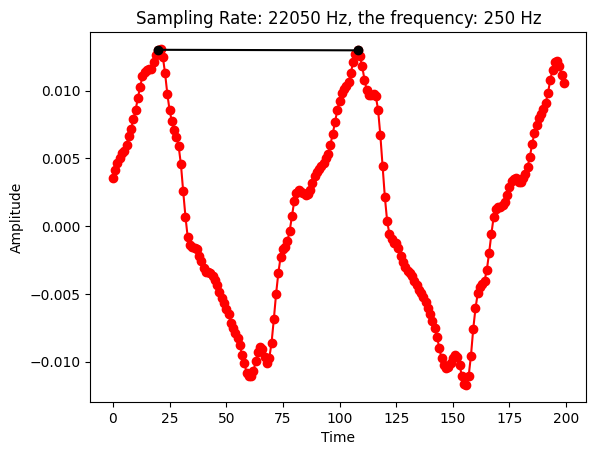

In [23]:
# plot a waveform
# In this case, to change the sampling rate to 11025 Hz, only every other points were taken
plt.figure()
plt.plot(np.arange(0,200),y[7000:7200], 'ro-')

# Assign a slice of y (y[7000:7200]) to y_slice
y_slice = y[7000:7200]

# find peaks inside the excerpt of the audio using scipy.signal.find_peaks
# after looking at the amplitude of peaks, set the height parameter
# in this example, the height of peaks is larger than 0.010
from scipy.signal import find_peaks
peaks, _ = find_peaks(y_slice, height=0.010) # peaks are [10 54 98]

# Create a line between the first and the second peak, which corresponds to the period
plt.plot([20,108], [y[7020],y[7108]],'k')
plt.plot([20,108], [y[7020],y[7108]],'ko')

# find difference between peaks using numpy.diff, which is the same as the period
# The frequency is the reciprocal of the period
# F0 = sr/np.average(np.diff(peaks))
p = np.diff(peaks) # The period is 88 points = 88/22050 second
# The frequency is the reciprocal of the period = 22050/88 = about 250 Hz (B3)
print('Periods: ', np.diff(peaks))
print('Period: ', np.average(np.diff(peaks)))
print('F0: ', sr/np.average(np.diff(peaks)))

plt.title("Sampling Rate: 22050 Hz, the frequency: 250 Hz")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# Part II: Frequency Domain Representations and Features

## Generate pure tones and their combinations

### Pure tone A3
- Frequency: A3, 220 Hz
- Length: 1 second
- Sampling rate: 22050 Hz

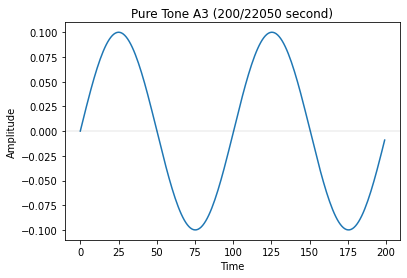

In [ ]:
T = 1.0 # seconds
f0 = 220.0 # fundamental frequency
sr = 22050 # sampling rate

t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
y = 0.1*np.sin(2*np.pi*f0*t)
sf.write(os.path.join(audio_folder,'tone_220.wav'), y, sr)

# plot a waveform of an excerpt of the pure tone just created
plt.plot(np.arange(0,200),y[0:200])
plt.title("Pure Tone A3 (200/22050 second)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.axhline(linewidth=0.1, color='k') # Add a horizontal line across the X axis
#plt.savefig("Pure_Tone_A3_220Hz.png")
plt.show()

# ipython.display.audio generates an audio player so that you can play an audio file
ipd.Audio(y, rate=sr)

### Pure tone A4
- Frequency: A4, 440 Hz
- Length: 1 second
- Sampling rate: 22050 Hz

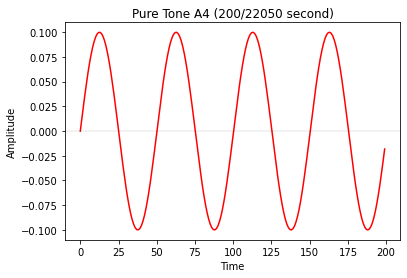

In [ ]:
f0 = 440.0
y2 = 0.1*np.sin(2*np.pi*f0*t)
sf.write(os.path.join(audio_folder,'tone_440.wav'), y2, sr)

# plot a waveform of an excerpt of the pure tone just created
plt.plot(np.arange(0,200),y2[0:200],'r')
plt.title("Pure Tone A4 (200/22050 second)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.axhline(linewidth=0.1, color='k')
plt.show()

# ipython.display.audio generates an audio player so that you can play an audio file
ipd.Audio(y2, rate=sr)

### Pure tone A5
- Frequency: A5, 880 Hz
- Length: 1 second
- Sampling rate: 22050 Hz

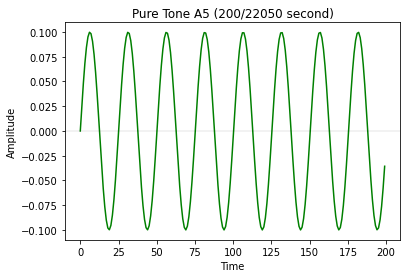

In [ ]:
f0 = 880.0
y3 = 0.1*np.sin(2*np.pi*f0*t)
sf.write(os.path.join(audio_folder,'tone_880.wav'), y3, sr)

# plot a waveform of an excerpt of the pure tone just created
plt.plot(np.arange(0,200),y3[0:200], 'g')
plt.title("Pure Tone A5 (200/22050 second)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.axhline(linewidth=0.1, color='k')
plt.show()

# ipython.display.audio generates an audio player so that you can play an audio file
ipd.Audio(y3, rate=sr)

### Combine the three sinusoids above to generate a sound

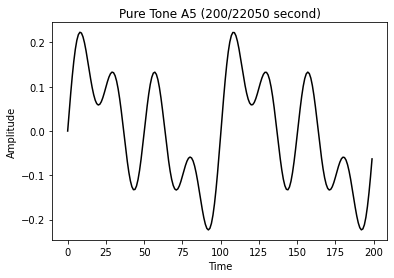

In [ ]:
y4 = y+y2+y3
sf.write(os.path.join(audio_folder,'tone_mix.wav'), y4, sr)

# plot a waveform of an excerpt of the pure tone just created
plt.plot(np.arange(0,200),y4[0:200], 'k')
plt.title("Pure Tone A5 (200/22050 second)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# ipython.display.audio generates an audio player so that you can play an audio file
ipd.Audio(y4, rate=sr)

### Plot the three original pure tones and their combination

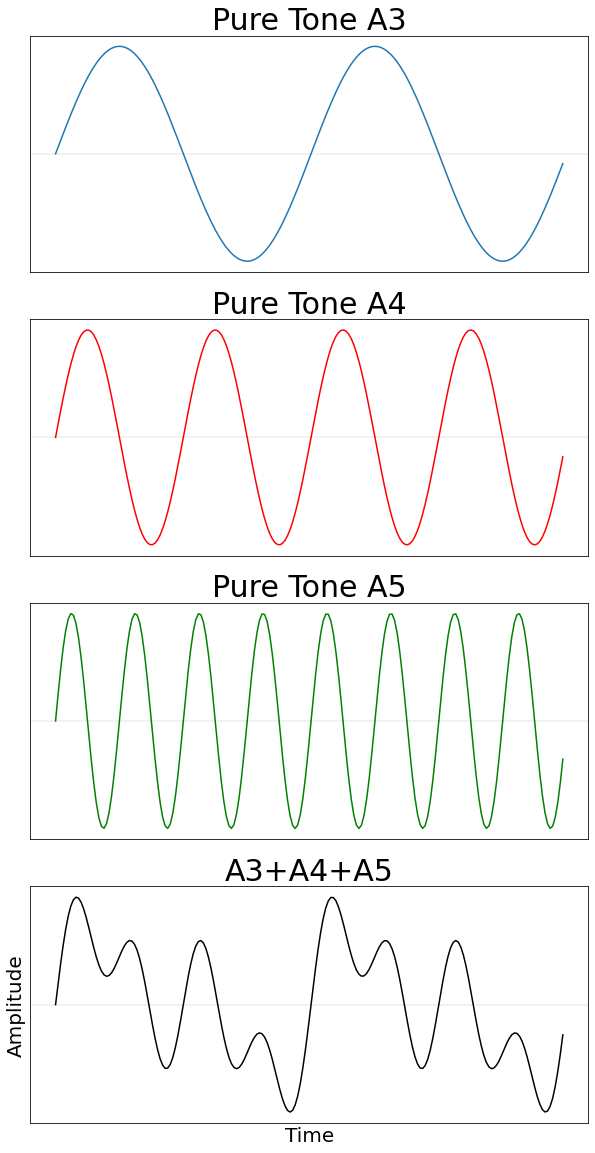

In [ ]:
plt.figure(num=None, figsize=(10, 20))
plt.subplot(4, 1, 1)
plt.plot(np.arange(0,200),y[0:200])
plt.title("Pure Tone A3", fontsize=30)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')

plt.subplot(4, 1, 2)
plt.plot(np.arange(0,200),y2[0:200],'r')
plt.title("Pure Tone A4", fontsize=30)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')

plt.subplot(4, 1, 3)
plt.plot(np.arange(0,200),y3[0:200], 'g')
plt.title("Pure Tone A5", fontsize=30)
plt.axhline(linewidth=0.1, color='k')
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)

plt.subplot(4, 1, 4)
plt.plot(np.arange(0,200),y4[0:200], 'k')
plt.title("A3+A4+A5", fontsize=30)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')
plt.show()

### Combine three sinusoids after shifting them a little

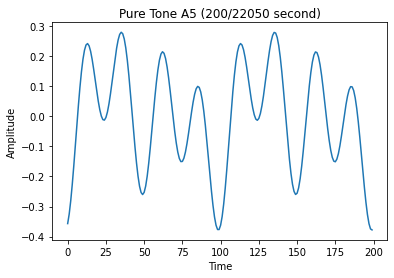

In [ ]:
y5 = 0.9*np.roll(y, 10)+1.2*np.roll(y2, 10)+2*np.roll(y3, 5)
sf.write(os.path.join(audio_folder,'tone_mix2.wav'), y5, sr)

# plot a waveform of an excerpt of the audio just created
plt.plot(np.arange(0,200),y5[0:200])
plt.title("Pure Tone A5 (200/22050 second)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# ipython.display.audio generates an audio player so that you can play an audio file
ipd.Audio(y5, rate=sr)

### Plot the three original pure tones and their combination

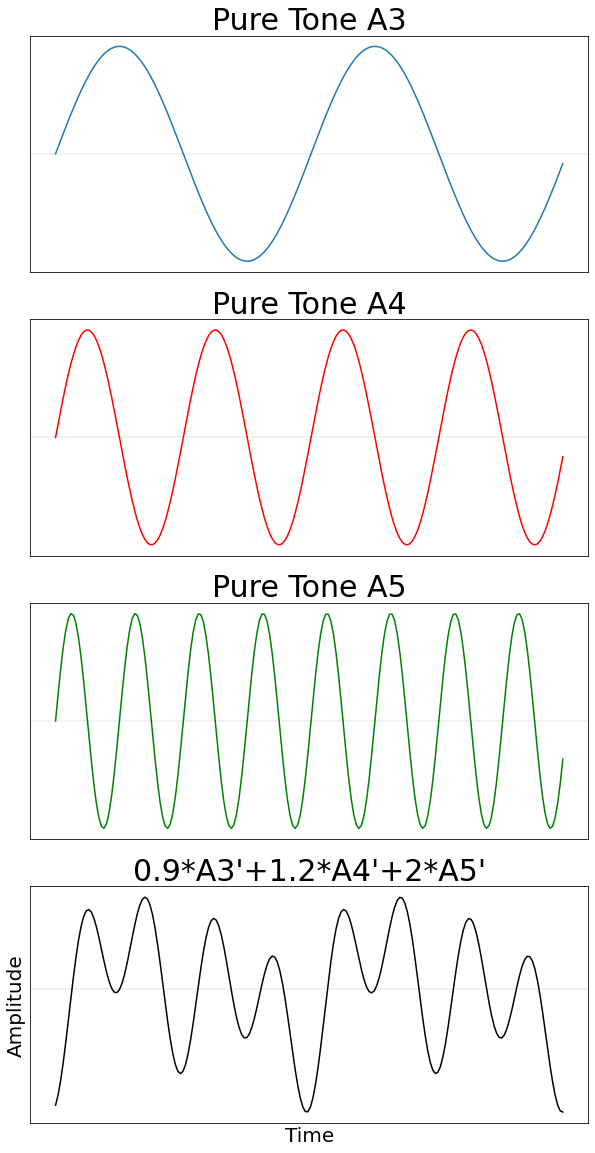

In [ ]:
plt.figure(num=None, figsize=(10, 20))
plt.subplot(4, 1, 1)
plt.plot(np.arange(0,200),y[0:200])
plt.title("Pure Tone A3", fontsize=30)
#plt.title("Pure Tone A3 220Hz")
#plt.xlabel("Time")
#plt.ylabel("Amplitude")
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')

plt.subplot(4, 1, 2)
plt.plot(np.arange(0,200),y2[0:200],'r')
plt.title("Pure Tone A4", fontsize=30)
#plt.xlabel("Time")
#plt.ylabel("Amplitude")
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')

plt.subplot(4, 1, 3)
plt.plot(np.arange(0,200),y3[0:200], 'g')
plt.title("Pure Tone A5", fontsize=30)
#plt.xlabel("Time")
#plt.ylabel("Amplitude")
plt.axhline(linewidth=0.1, color='k')
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)

plt.subplot(4, 1, 4)
plt.plot(np.arange(0,200),y5[0:200], 'k')
# an additive combination of the three sinusoids with varying amplitudes and phases
plt.title("0.9*A3'+1.2*A4'+2*A5'", fontsize=30)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')
plt.show()

## Discrete Fourier Transform (DFT) of Pure Tones

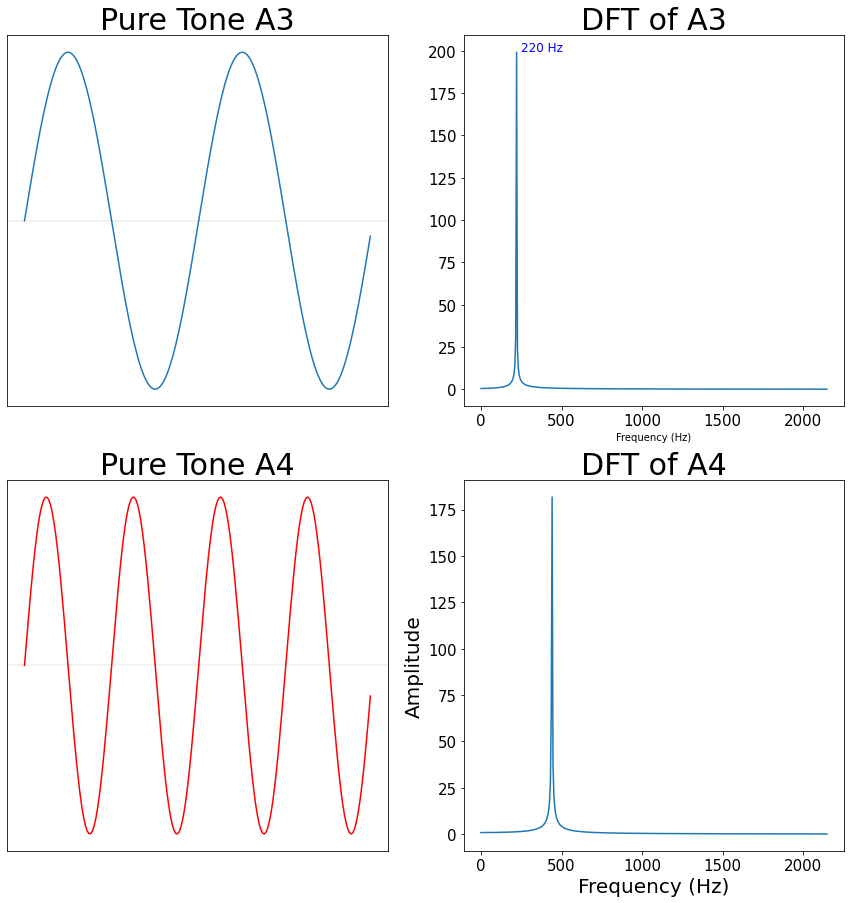

In [ ]:
filename = os.path.join(audio_folder,'tone_220.wav')
y, sr = librosa.load(filename)

plt.figure(num=None, figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(np.arange(0,200),y[0:200])
plt.title("Pure Tone A3", fontsize=30)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')

# scipy.fft.fft computes the one-dimensional n-point discrete Fourier Transform (DFT)
# with the efficient Fast Fourier Transform (FFT) algorithm
X = sp.fft.fft(y[:4096])          # Compute the one-dimensional discrete Fourier Transform
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
plt.subplot(2, 2, 2)
plt.plot(f[:400], X_mag[:400]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.title("DFT of A3", fontsize=30)
plt.tick_params(labelsize=15)
plt.text(250,200,'220 Hz', fontsize=12, color='b') # text function adds a text to a plot




filename = os.path.join(audio_folder,'tone_440.wav')
y2, sr = librosa.load(filename)

plt.subplot(2, 2, 3)
plt.plot(np.arange(0,200),y2[0:200],'r')
plt.title("Pure Tone A4", fontsize=30)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')

# scipy.fft.fft computes the one-dimensional n-point discrete Fourier Transform (DFT)
# with the efficient Fast Fourier Transform (FFT) algorithm
X = sp.fft.fft(y2[:4096])         # Compute the one-dimensional discrete Fourier Transform
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
plt.subplot(2, 2, 4)
plt.plot(f[:400], X_mag[:400]) # magnitude spectrum
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.title("DFT of A4", fontsize=30)
plt.ylabel("Amplitude", fontsize=20)
plt.tick_params(labelsize=15)
#plt.text(500,180,'440 Hz', fontsize=12, color='r') # text function adds a text to a plot
plt.show()

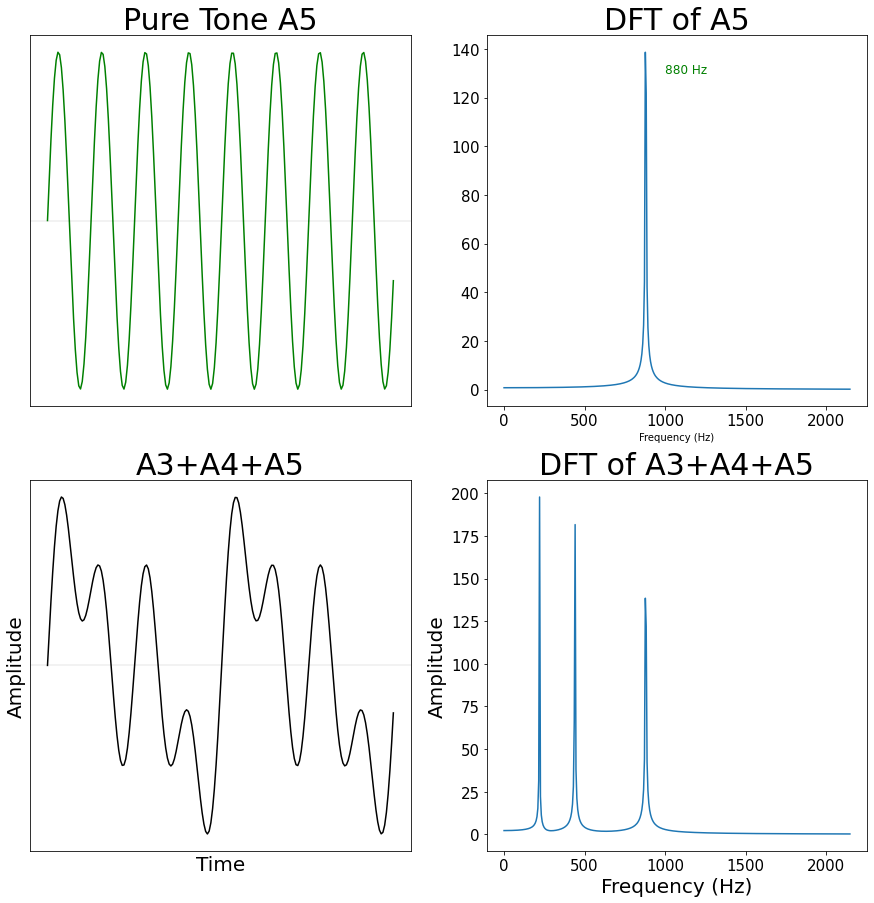

In [ ]:
plt.figure(num=None, figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(np.arange(0,200),y3[0:200], 'g')
plt.title("Pure Tone A5", fontsize=30)
plt.axhline(linewidth=0.1, color='k')
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)

# scipy.fft.fft computes the one-dimensional n-point discrete Fourier Transform (DFT)
# with the efficient Fast Fourier Transform (FFT) algorithm
X = sp.fft.fft(y3[:4096])         # Compute the one-dimensional discrete Fourier Transform
X_mag = np.absolute(X)       # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
plt.subplot(2, 2, 2)
plt.plot(f[:400], X_mag[:400]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.title("DFT of A5", fontsize=30)
plt.tick_params(labelsize=15)
plt.text(1000,130,'880 Hz', fontsize=12, color='g') # text function adds a text to a plot

plt.subplot(2, 2, 3)
plt.plot(np.arange(0,200),y4[0:200], 'k')
plt.title("A3+A4+A5", fontsize=30)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')

# scipy.fft.fft computes the one-dimensional n-point discrete Fourier Transform (DFT)
# with the efficient Fast Fourier Transform (FFT) algorithm
X = sp.fft.fft(y4[:4096])         # Compute the one-dimensional discrete Fourier Transform
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
plt.subplot(2, 2, 4)
plt.plot(f[:400], X_mag[:400]) # magnitude spectrum
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.title("DFT of A3+A4+A5", fontsize=30)
plt.tick_params(labelsize=15)

plt.show()

## Discrete Fourier Transform of Sound of Real Instruments

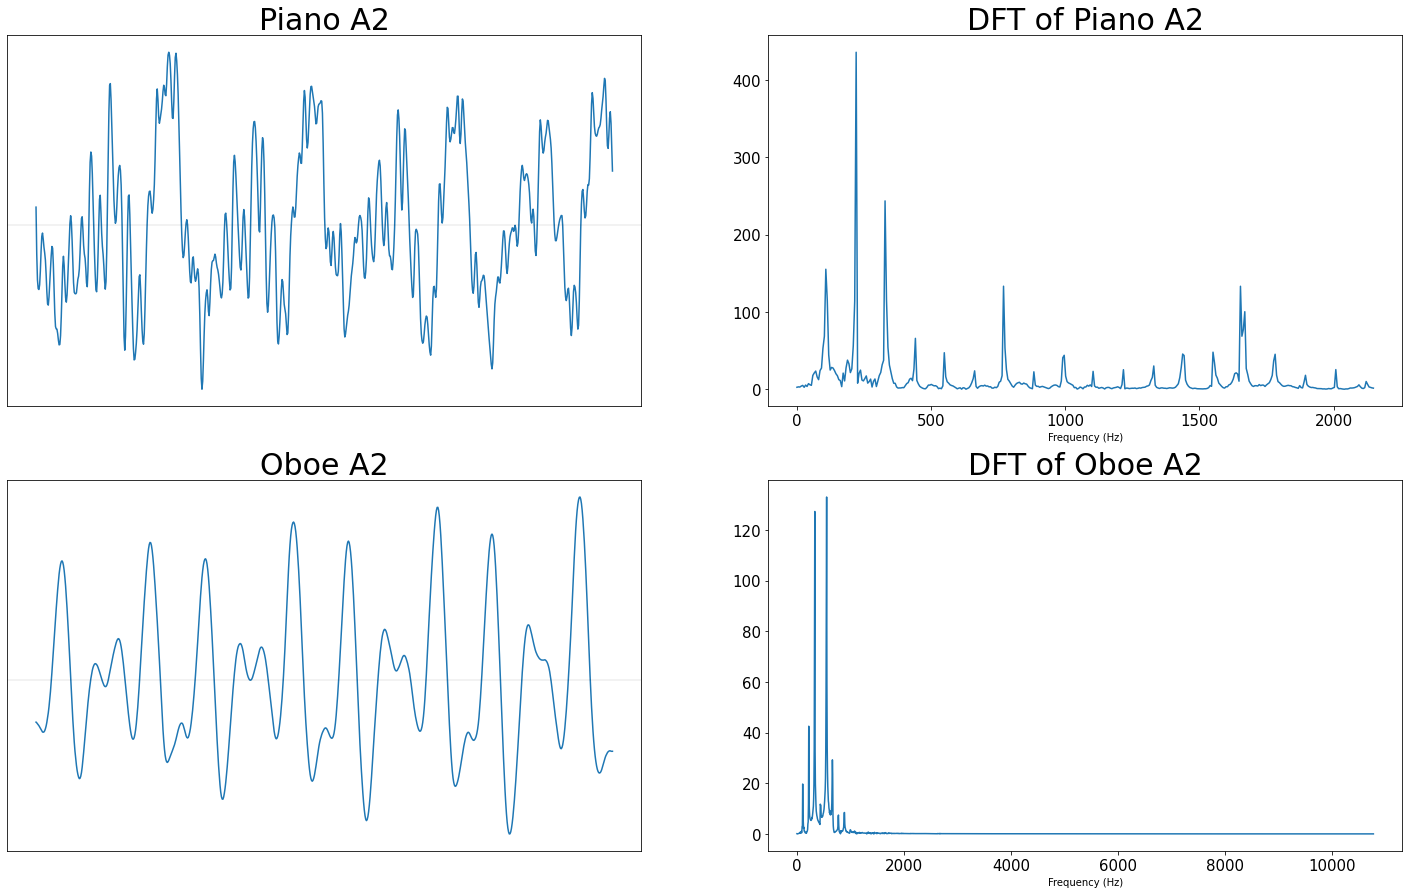

In [ ]:
filename = os.path.join(audio_folder,'piano_A2.wav')
y, sr = librosa.load(filename)

plt.figure(num=None, figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(np.arange(0,800),y[1000:1800])
plt.title("Piano A2", fontsize=30)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')

# scipy.fft.fft computes the one-dimensional n-point discrete Fourier Transform (DFT)
# with the efficient Fast Fourier Transform (FFT) algorithm
X = sp.fft.fft(y[:4096])          # Compute the one-dimensional discrete Fourier Transform
X_mag = np.absolute(X)         # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
plt.subplot(2, 2, 2)
plt.plot(f[:400], X_mag[:400]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.title("DFT of Piano A2", fontsize=30)
plt.tick_params(labelsize=15)

filename = os.path.join(audio_folder,'oboe_A2.wav')
y2, sr = librosa.load(filename)

plt.subplot(2, 2, 3)
plt.plot(np.arange(0,800),y2[1000:1800])
plt.title("Oboe A2", fontsize=30)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')

# scipy.fft.fft computes the one-dimensional n-point discrete Fourier Transform (DFT)
# with the efficient Fast Fourier Transform (FFT) algorithm
X = sp.fft.fft(y2[:4096])         # Compute the one-dimensional discrete Fourier Transform
X_mag = np.absolute(X)         # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
plt.subplot(2, 2, 4)
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.title("DFT of Oboe A2", fontsize=30)
plt.tick_params(labelsize=15)

plt.show()

In [ ]:
# ipython.display.audio generates an audio player so that you can play an audio file
ipd.Audio(y, rate=sr) # Piano

In [ ]:
# ipython.display.audio generates an audio player so that you can play an audio file
ipd.Audio(y2, rate=sr) # Oboe

## Spectrogram

Short-time Fourier Transform (STFT)

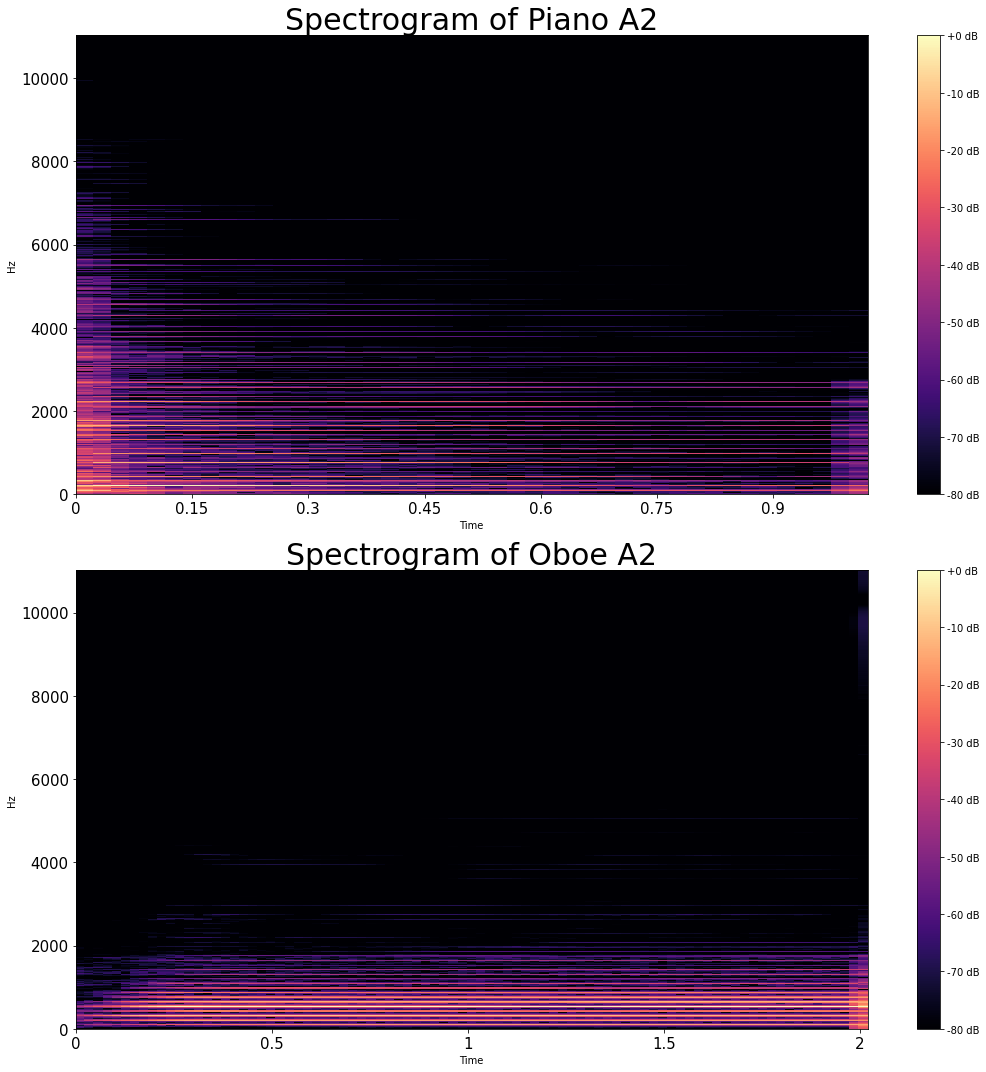

In [ ]:
filename = os.path.join(audio_folder,'piano_A2.wav')
y, sr = librosa.load(filename)

plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=4096)), ref=np.max)
librosa.display.specshow(D, y_axis='linear',  x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Piano A2', fontsize=30)
plt.tick_params(labelsize=15)
plt.tight_layout()

filename = os.path.join(audio_folder,'oboe_A2.wav')
y2, sr = librosa.load(filename)

plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)
librosa.display.specshow(D, y_axis='linear',  x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Oboe A2', fontsize=30)
plt.tick_params(labelsize=15)
plt.tight_layout()
plt.show()

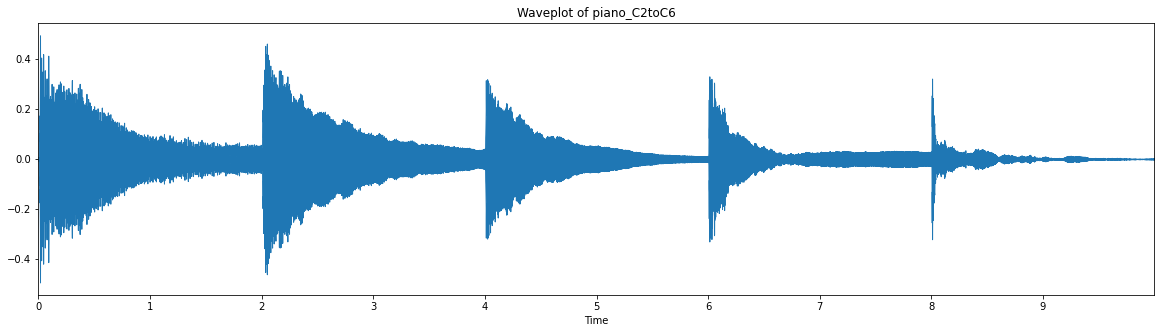

In [ ]:
filename = os.path.join(audio_folder,'piano_C2toC6.wav')
y, sr = librosa.load(filename)

# Visualize an Audio File using librosa.display.waveplot
plt.figure(num=None, figsize=(20, 5))
librosa.display.waveplot(y, sr=sr)
plt.title('Waveplot of piano_C2toC6')
plt.show()


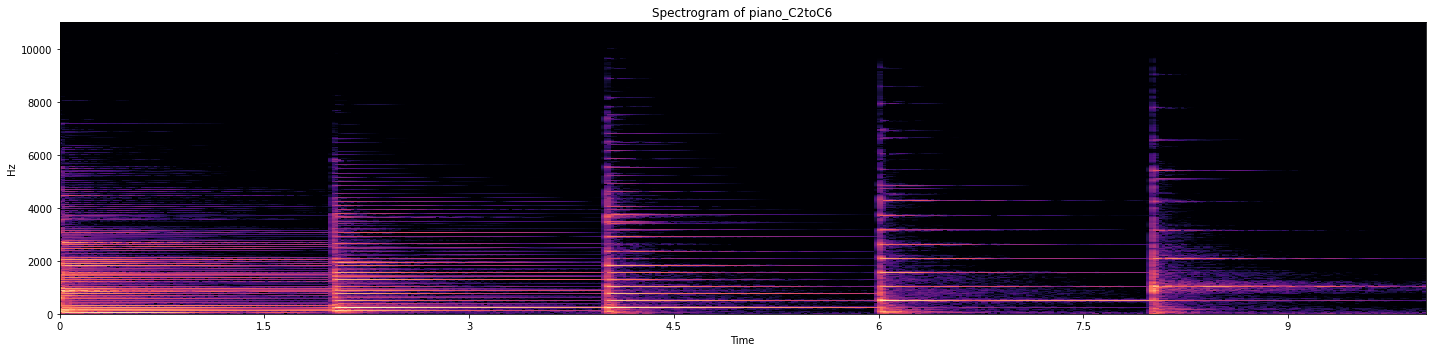

In [ ]:
plt.figure(num=None, figsize=(20, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear',  x_axis='time')
#plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of piano_C2toC6')
plt.tight_layout()
plt.show()

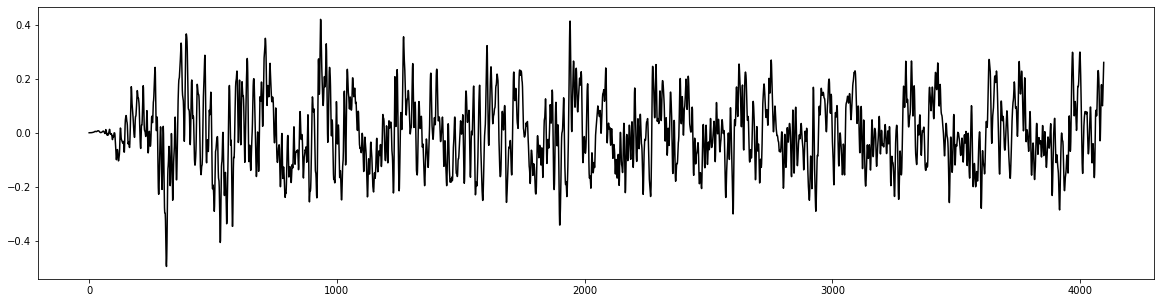

In [ ]:
plt.figure(num=None, figsize=(20, 5))
plt.plot(np.arange(0,4096),y[0:4096], 'k')
plt.show()

## Finding F0 using STFT

(44100,)
(2049, 44)


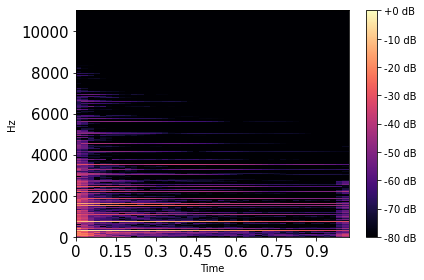

In [ ]:
filename = os.path.join(audio_folder,'piano_A2.wav')
y, sr = librosa.load(filename)
print(y.shape)

plt.figure()
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=4096)), ref=np.max)
print(D.shape) # (2049, 44)
# 2049 = the number of rows in the STFT matrix D is (1 + n_fft/2), default n_fft = 4096
# 44 = 44100 points (y.shape) /1024 (hop_length)

librosa.display.specshow(D, y_axis='linear',  x_axis='time')
plt.colorbar(format='%+2.0f dB')
#plt.title('Spectrogram of Piano A2', fontsize=30)
plt.tick_params(labelsize=15)
plt.tight_layout()

In [ ]:
from scipy.signal import find_peaks
peaks = [find_peaks(D[:,x], height = -20 )[0] for x in range(D.shape[1])]
peaks = np.array(peaks)
peaks

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


array([array([ 19,  21,  37,  39,  42,  60,  63,  83, 143, 145, 185, 268, 304,
              306, 308, 311, 330, 503])                                       ,
       array([ 20,  41,  61,  82, 143, 185, 268, 288, 307, 330, 416, 503]),
       array([ 20,  41,  61,  82, 102, 143, 184, 268, 288, 307, 310, 331, 416,
              502])                                                           ,
       array([ 20,  41,  61,  82, 102, 143, 184, 267, 288, 307, 309, 416]),
       array([ 20,  41,  61,  82, 102, 143, 268, 288, 307, 309]),
       array([ 20,  41,  61,  82, 143, 267, 307, 309]),
       array([ 20,  41,  61,  82, 143, 267, 307, 309]),
       array([ 20,  41,  61,  82, 143, 307, 309]),
       array([ 20,  41,  61,  82, 143, 307, 309]),
       array([ 20,  41,  61, 143, 309]), array([ 20,  41,  61, 143]),
       array([ 20,  41,  61, 143]), array([ 20,  41,  61, 143]),
       array([ 20,  41,  61, 143]), array([ 20,  41,  61, 143]),
       array([ 20,  41,  61, 143]), array([ 20,  4

In [ ]:
freqs = librosa.fft_frequencies(sr=22050, n_fft=4096)
(freqs[20]+freqs[21])/2 # 110 Hz: A2

110.357666015625

## Mel-Frequency Cepstrum Coefficients (MFCC)

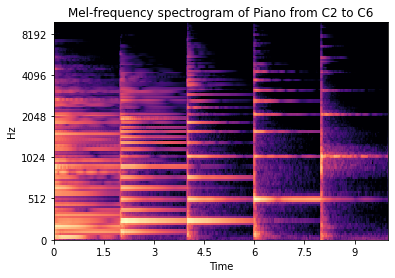

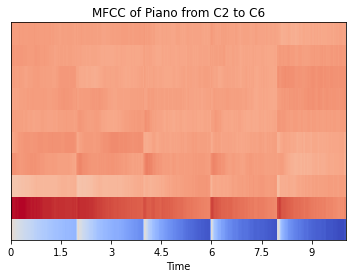

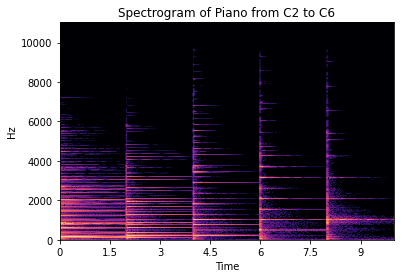

In [ ]:
filename = os.path.join(audio_folder,'piano_C2toC6.wav')
y, sr = librosa.load(filename)

plt.figure()
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=10000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, fmax=10000)
plt.title('Mel-frequency spectrogram of Piano from C2 to C6')
plt.savefig('melspectrogram-C2toC6.pdf', format='pdf')

plt.figure()
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)
librosa.display.specshow(mfccs, x_axis='time')
plt.title('MFCC of Piano from C2 to C6')
plt.savefig('MFCC-C2toC6.pdf', format='pdf')

plt.figure()
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear',  x_axis='time')
plt.title('Spectrogram of Piano from C2 to C6')
plt.savefig('stft-C2toC6.pdf', format='pdf')

## Constant Q Transform (CQT)

Piano notes ( C2, C\#2, D2, D\#2, E2)

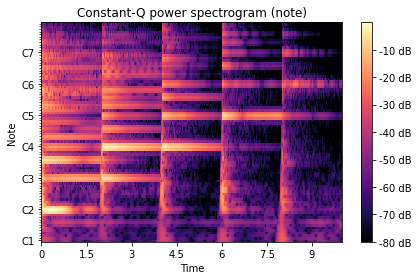

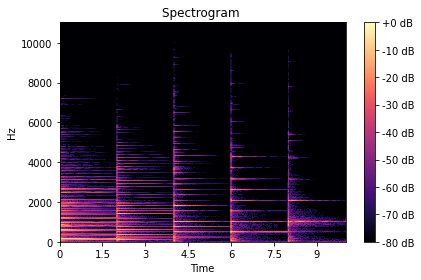

In [ ]:
filename = os.path.join(audio_folder, 'piano_C2toC6.wav')
y, sr = librosa.load(filename)

plt.figure()
CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
librosa.display.specshow(CQT, y_axis='cqt_note', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')
plt.tight_layout()
plt.show()

plt.figure()
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear',  x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram ')
plt.tight_layout()
plt.show()

## Constant Q Transform (CQT)

Piano notes ( C2, C3, C4, C5, C6 )

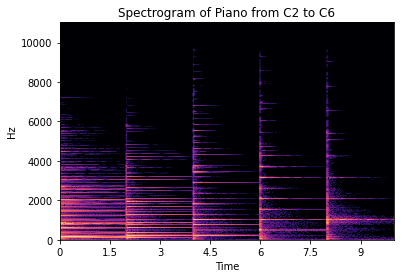

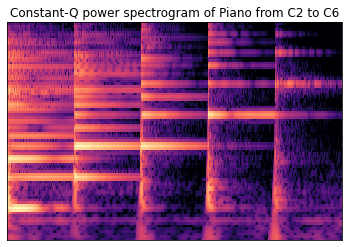

In [ ]:
filename = os.path.join(audio_folder,'piano_C2toC6.wav')
y, sr = librosa.load(filename)

plt.figure()
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear',  x_axis='time')
plt.title('Spectrogram of Piano from C2 to C6')
plt.savefig('stft-C2toC6.pdf', format='pdf')

CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
plt.figure()
librosa.display.specshow(CQT)

plt.title('Constant-Q power spectrogram of Piano from C2 to C6')
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)

plt.savefig('cqt-C2toC6.pdf', format='pdf')

## Finding F0 using CQT

You can simply find F0s of notes by increasing the height of CQT to identify the notes clearly

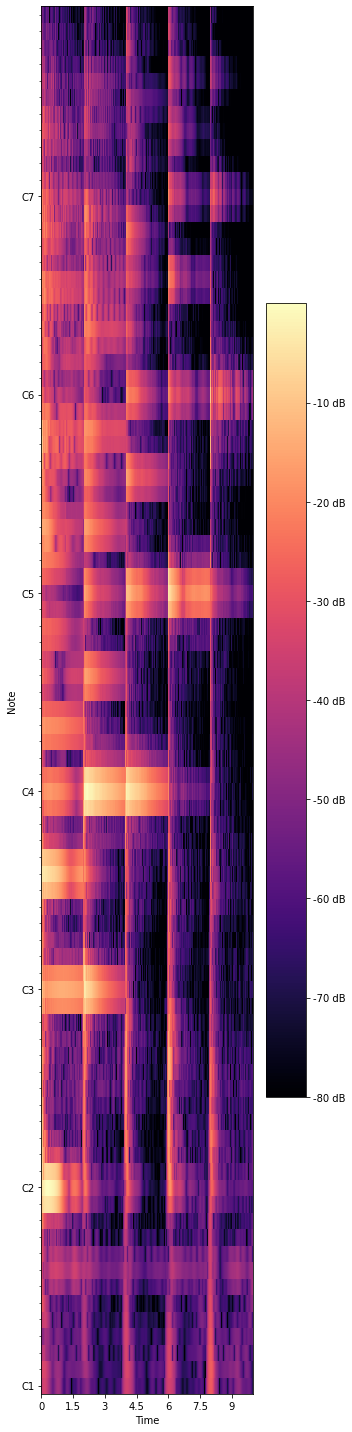

In [ ]:
filename = os.path.join(audio_folder,'piano_C2toC6.wav')
y, sr = librosa.load(filename)

CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
plt.figure(figsize=(5, 20))
librosa.display.specshow(CQT, y_axis='cqt_note', x_axis='time')
plt.colorbar(format='%+2.0f dB')
#plt.title('Constant-Q power spectrogram (note)')
plt.tight_layout()
plt.show()

## Chromagram

You can find a chord using Chromagram

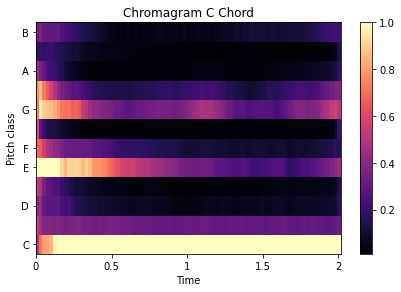

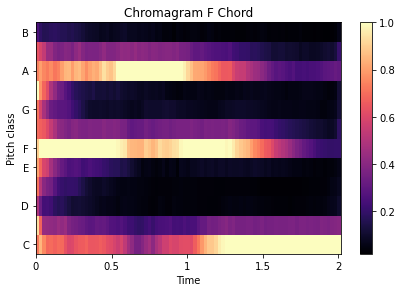

In [ ]:
filename = os.path.join(audio_folder,'C_chord.wav') # C, E, G
y, sr = librosa.load(filename)

C = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=24)
plt.figure()
librosa.display.specshow(C, y_axis='chroma',  x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.title('Chromagram C Chord')
plt.savefig('chromagram_C_chord.pdf', format='pdf')

filename = os.path.join(audio_folder,'F_chord.wav') # F, A, C
y2, sr = librosa.load(filename)

C2 = librosa.feature.chroma_cqt(y=y2, sr=sr, bins_per_octave=24)
plt.figure()
librosa.display.specshow(C2, y_axis='chroma',  x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.title('Chromagram F Chord')
plt.savefig('chromagram_F_chord.pdf', format='pdf')

# The codes below are taken out of the lecture slides

You can simply ignore the codes below.

## Timbre

Display waveforms of the audio files of the three different instruments at the same frequency to identify their different timbres.
- Piano A2
- String ensembles A2
- Oboe A2

Slide #8

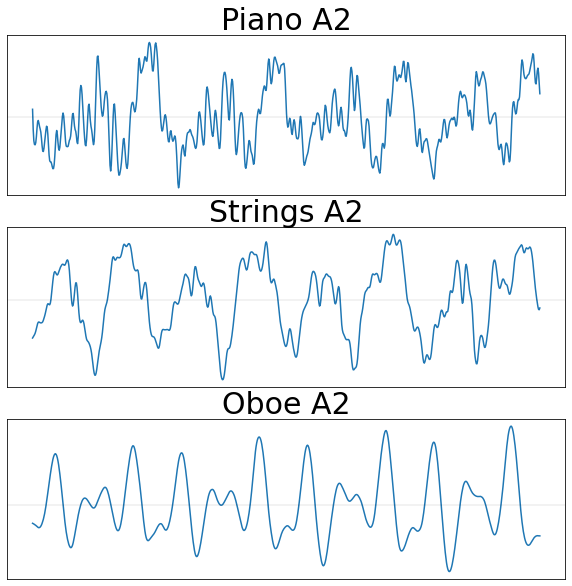

In [ ]:
# Piano A2
filename = os.path.join(audio_folder,'piano_A2.wav')
y, sr = librosa.load(filename)

# plot a waveform of an excerpt
plt.figure(num=None, figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(np.arange(0,800),y[1000:1800])
plt.title("Piano A2", fontsize=30)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')

#String ensembles A2
filename = os.path.join(audio_folder,'strings_A2.wav')
y2, sr = librosa.load(filename)

# plot a waveform of an excerpt
plt.subplot(3, 1, 2)
plt.plot(np.arange(0,800),y2[1000:1800])
plt.title("Strings A2", fontsize=30)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')

# Oboe A2
filename = os.path.join(audio_folder,'oboe_A2.wav')
y3, sr = librosa.load(filename)

# plot a waveform of an excerpt
plt.subplot(3, 1, 3)
plt.plot(np.arange(0,800),y3[1000:1800])
plt.title("Oboe A2", fontsize=30)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.axhline(linewidth=0.1, color='k')
plt.show()

## Zero Crossing Rate

The Zero-Crossing Rate (ZCR): The number of times the audio signal waveform crosses the zero amplitude level during a one second interval.

It coule be used as a measure of the noisiness of a signal.

### Synthesize a pure tone A6
- Frequency: A6, 1760 Hz
- Length: 1 second
- Sampling rate: 22050 Hz

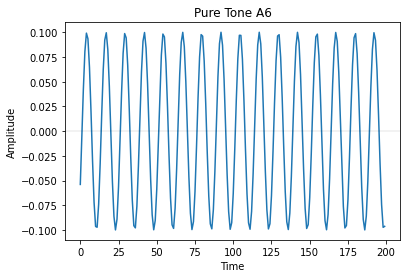

In [ ]:
T = 1.0 # seconds
f0 = 1760.0 # fundamental frequency
sr = 22050 # sampling rate

t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
y = 0.1*np.sin(2*np.pi*f0*t)
sf.write(os.path.join(audio_folder,'tone_1760.wav'), y, sr)

# plot a waveform of an excerpt of the pure tone just created
plt.plot(np.arange(0,200),y[500:700])
plt.title("Pure Tone A6")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.axhline(linewidth=0.1, color='k')
plt.show()

# ipython.display.audio generates an audio player so that you can play an audio file
ipd.Audio(y, rate=sr)

In [ ]:
print("The zero crossing rate of pure tone A6: ",librosa.feature.zero_crossing_rate(y[500:700])) # 0.015625

The zero crossing rate of pure tone A6:  [[0.015625]]


### Synthesize a noisy sound

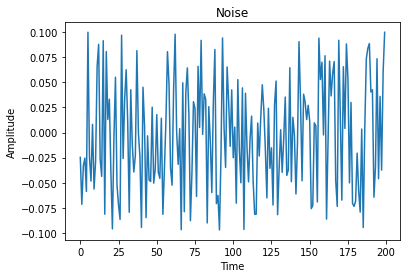

In [ ]:
T = 1.0 # seconds
sr = 22050 # sampling rate
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
noise = 0.2*np.random.uniform(0,1,22050)-0.1 # generate an array of random numbers from a uniform distribution
sf.write(os.path.join(audio_folder,'noise.wav'), noise, sr)

# plot a waveform of an excerpt of the pure tone just created
plt.plot(np.arange(0,200),noise[500:700])
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# ipython.display.audio generates an audio player so that you can play an audio file
ipd.Audio(noise, rate=sr)

In [ ]:
print("The zero crossing rate of the noise: ",librosa.feature.zero_crossing_rate(noise[500:700]))

The zero crossing rate of the noise:  [[0.05224609]]


### Tempo

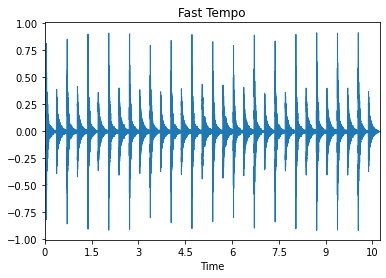

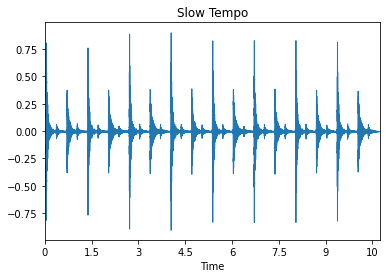

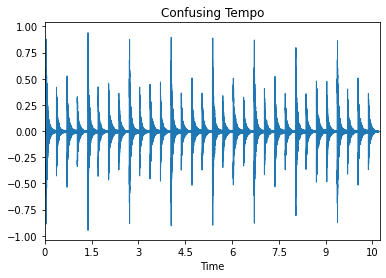

In [ ]:
filename = os.path.join(audio_folder,'fast.wav')
y, sr = librosa.load(filename)
plt.figure()
librosa.display.waveplot(y, sr=sr)
plt.title("Fast Tempo")
plt.savefig('fast.pdf', format='pdf')

filename = os.path.join(audio_folder,'slow.wav')
y, sr = librosa.load(filename)
plt.figure()
librosa.display.waveplot(y, sr=sr)
plt.title("Slow Tempo")
plt.savefig('slow.pdf', format='pdf')

filename = os.path.join(audio_folder,'slow_confusing.wav')
y, sr = librosa.load(filename)
plt.figure()
librosa.display.waveplot(y, sr=sr)
plt.title("Confusing Tempo")
plt.savefig('confusing.pdf', format='pdf')

tempo of fast.wav:  [89.10290948]


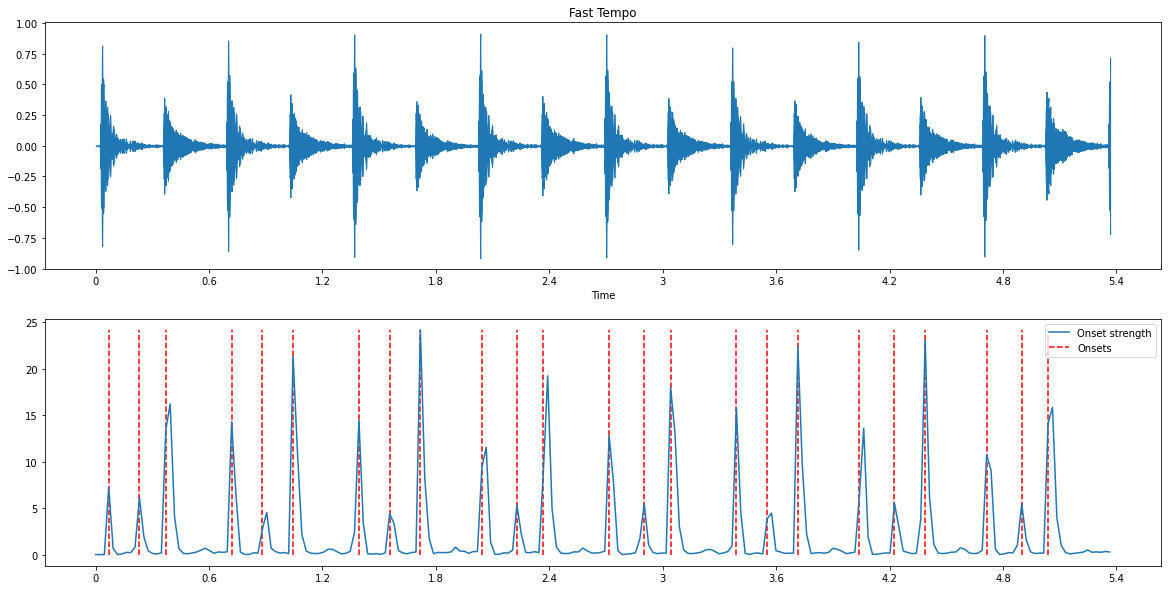

In [ ]:
filename = os.path.join(audio_folder,'fast.wav')
y, sr = librosa.load(filename)
y = y[0:118368]
plt.figure(num=None, figsize=(20,10))
ax1 = plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title("Fast Tempo")
plt.axis('tight')
#onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
#librosa.frames_to_time(onset_frames, sr=sr)

plt.subplot(2, 1, 2, sharex=ax1)
#librosa.display.waveplot(y, sr=sr)
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=1, linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

tempo = librosa.beat.tempo(onset_envelope=o_env, sr=sr)
print("tempo of fast.wav: ",tempo)

# ipython.display.audio generates an audio player so that you can play the audio file
ipd.Audio(y, rate=sr)

tempo of slow.wav:  [89.10290948]


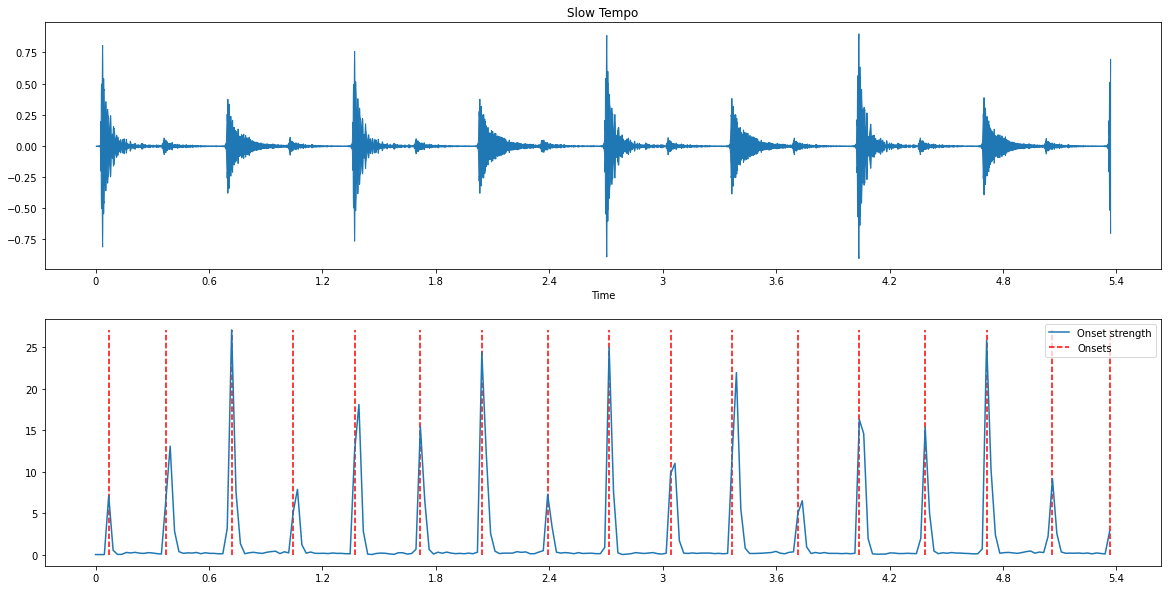

In [ ]:
filename = os.path.join(audio_folder,'slow.wav')
y, sr = librosa.load(filename)
y = y[0:118368]
plt.figure(num=None, figsize=(20,10))
ax1 = plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title("Slow Tempo")
plt.axis('tight')
#onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
#librosa.frames_to_time(onset_frames, sr=sr)

plt.subplot(2, 1, 2, sharex=ax1)
#librosa.display.waveplot(y, sr=sr)
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=1, linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

tempo = librosa.beat.tempo(onset_envelope=o_env, sr=sr)
print("tempo of slow.wav: ",tempo)

# ipython.display.audio generates an audio player so that you can play the audio file
ipd.Audio(y, rate=sr)

tempo of confusing.wav:  [89.10290948]


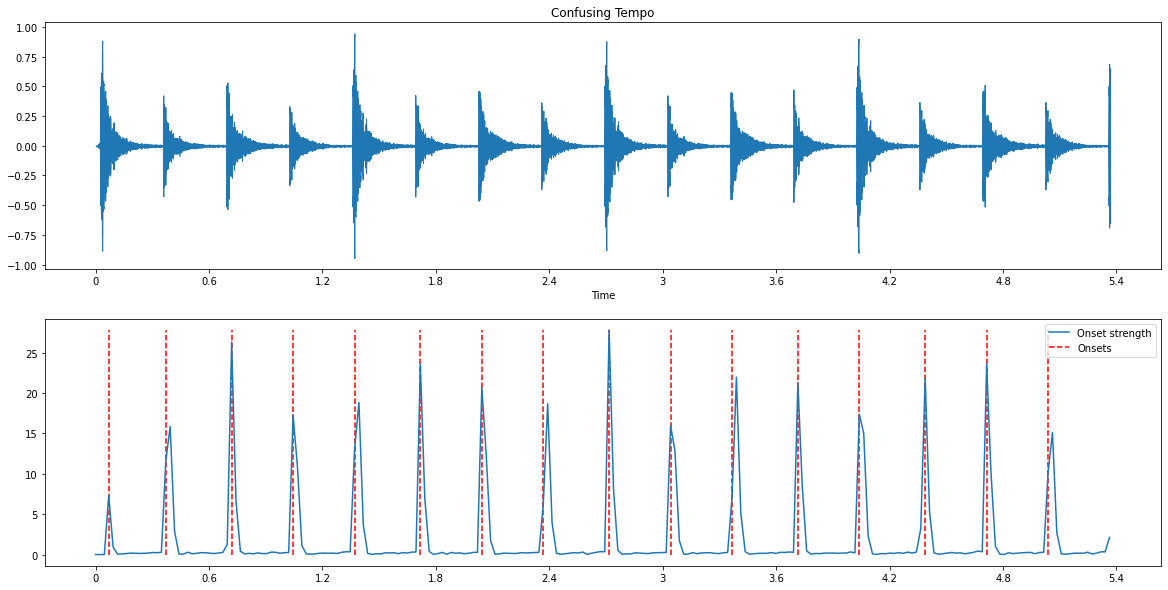

In [ ]:
filename = os.path.join(audio_folder,'slow_confusing.wav')
y, sr = librosa.load(filename)
y = y[0:118368]
plt.figure(num=None, figsize=(20,10))
ax1 = plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title("Confusing Tempo")
plt.axis('tight')
#onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
#librosa.frames_to_time(onset_frames, sr=sr)

plt.subplot(2, 1, 2, sharex=ax1)
#librosa.display.waveplot(y, sr=sr)
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=1, linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

tempo = librosa.beat.tempo(onset_envelope=o_env, sr=sr)
print("tempo of confusing.wav: ",tempo)

# ipython.display.audio generates an audio player so that you can play the audio file
ipd.Audio(y, rate=sr)